In [3]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     -------- ------------------------------- 10.2/48.7 kB ? eta -:--:--
     ------------------------------- ------ 41.0/48.7 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 492.9 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [10]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 158s 1us/step


In [12]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [18]:
y_train.shape

(50000, 1)

In [20]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [26]:
y_test = y_test.reshape(-1,)

In [28]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

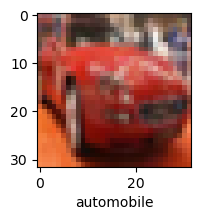

In [36]:
plot_sample(X_train, y_train, 5)

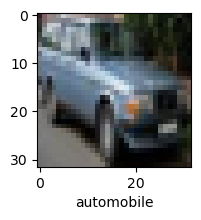

In [44]:
plot_sample(X_train, y_train, 201)

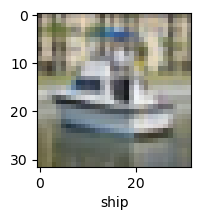

In [46]:
plot_sample(X_train, y_train, 501)

In [48]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [56]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.2996 - loss: 1.9334
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.4195 - loss: 1.6452
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4535 - loss: 1.5544
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.4735 - loss: 1.4922
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 34ms/step - accuracy: 0.4929 - loss: 1.4408


In [64]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]


print('Classification Report: \n', classification_report(y_test, y_pred_classes))


print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.55      0.57      1000
           1       0.70      0.48      0.57      1000
           2       0.41      0.29      0.34      1000
           3       0.34      0.33      0.34      1000
           4       0.47      0.26      0.34      1000
           5       0.52      0.23      0.32      1000
           6       0.33      0.83      0.48      1000
           7       0.48      0.63      0.54      1000
           8       0.65      0.61      0.63      1000
           9       0.57      0.56      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000

Confusion Matrix: 
 [[546  22  61  36  17   3  93  66 117  39]
 [ 42 483  13  41   6   6  70  66  57 216]
 [ 54  14 292  96  79  31 317  93  19   5]
 [ 27  11  65 333  32  92 

In [66]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

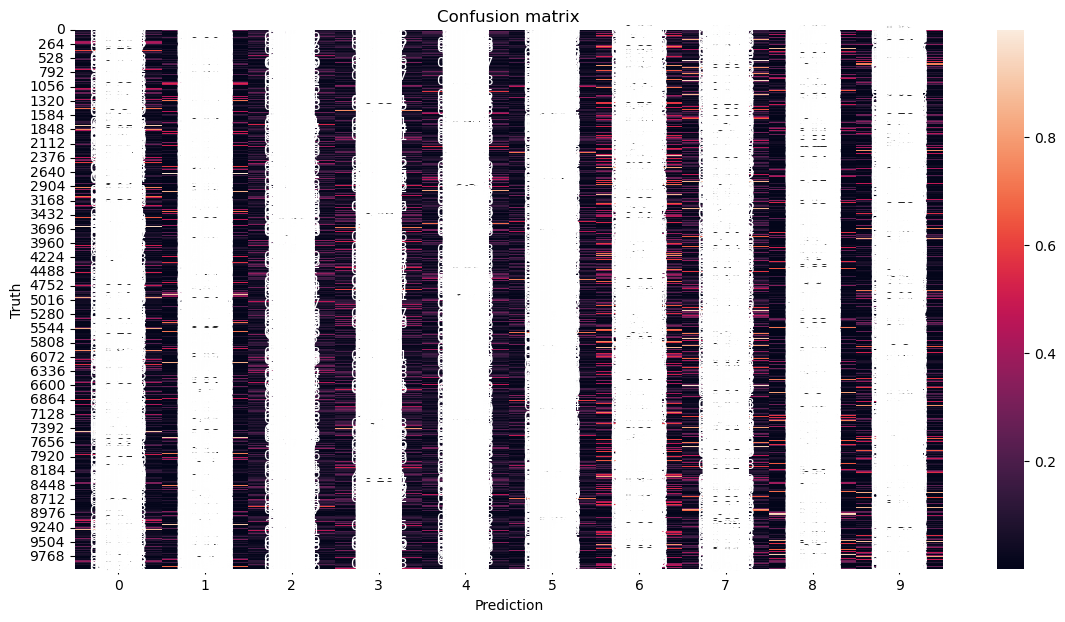

In [68]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [74]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

])

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
cnn.compile(optimizer='adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])


In [80]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.3917 - loss: 1.6727
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6005 - loss: 1.1391
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6513 - loss: 0.9993
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6852 - loss: 0.9053
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7084 - loss: 0.8391
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7285 - loss: 0.7776
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7485 - loss: 0.7266
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7616 - loss: 0.6780
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7783 - loss: 0.6317
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7956 - loss: 0.5952


In [82]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7055 - loss: 0.9281


[0.941278338432312, 0.699999988079071]

In [84]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[1.5541775e-03, 4.1627904e-05, 2.2320368e-03, 8.9713442e-01,
        4.5565193e-04, 8.9650914e-02, 6.0333684e-03, 9.2000957e-04,
        1.5682040e-03, 4.0951907e-04],
       [7.8603603e-05, 3.2833184e-03, 8.4618918e-08, 5.3217004e-09,
        3.6313466e-10, 6.9868528e-10, 4.4386624e-08, 9.4603536e-10,
        9.9659413e-01, 4.3805063e-05],
       [7.4860029e-02, 2.7834475e-02, 1.7464104e-04, 3.2642744e-03,
        2.4881886e-04, 1.3804117e-03, 8.5624204e-05, 1.5436577e-03,
        8.7842858e-01, 1.2179569e-02],
       [8.9581358e-01, 5.2622054e-03, 2.9738100e-02, 8.1713416e-04,
        4.9890019e-02, 5.2591491e-05, 2.7020104e-04, 1.9113630e-05,
        1.8105710e-02, 3.1316809e-05],
       [2.6169599e-07, 3.4789127e-06, 3.6112703e-03, 1.9865189e-02,
        4.2711234e-01, 5.5081397e-04, 5.4885215e-01, 1.6006351e-06,
        2.8496145e-06, 7.9082980e-08]], dtype=float32)

In [86]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [88]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

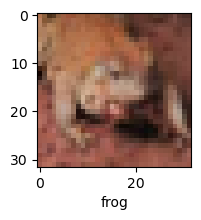

In [94]:
plot_sample(X_test, y_test, 5)

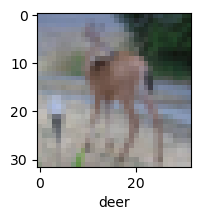

In [92]:
plot_sample(X_test, y_test, 100)

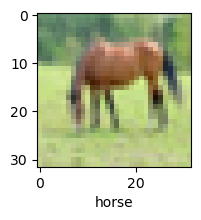

In [98]:
plot_sample(X_test, y_test, 60)

In [96]:
classes[y_classes[4]]

'frog'